In [ ]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

# 1. Create a sample pandas DataFrame with Main Tasks and Subtasks - SIMPLIFIED
# National level analysis and its subtasks removed, GDD Data Analysis extended

data = {
    'Task': [
        'GDD Data Analysis',
        '  Age period cohort modeling',
        '  New categories : Ultra-processed foods, Fish and seafood',
        '  Mapping carbohydrates, proteins and fats of foods',
        '  Visualization of trends',
        'Scenario analysis',
        'GLOBIOM',
    ],
    'Start': [
        # GDD Data Analysis phase (now extended to July 6)
        datetime(2025, 6, 7), datetime(2025, 6, 7), datetime(2025, 6, 9),
        datetime(2025, 6, 11), datetime(2025, 6, 13),
        # Scenario analysis (between meetings 2 and 3)
        datetime(2025, 7, 8),
        # GLOBIOM (between meetings 3 and 4)
        datetime(2025, 7, 31)
    ],
    'End': [
        # GDD Data Analysis phase now ends before meeting 2
        datetime(2025, 7, 6), datetime(2025, 6, 8), datetime(2025, 6, 10),
        datetime(2025, 6, 12), datetime(2025, 7, 6),
        # Scenario analysis ends before meeting 3
        datetime(2025, 7, 29),
        # GLOBIOM ends before meeting 4
        datetime(2025, 8, 14)
    ],
    'Type': [
        'Main Task', 'Subtask', 'Subtask', 'Subtask', 'Subtask',
        'Main Task',
        'Main Task',
    ]
}
df = pd.DataFrame(data)

# Ensure 'Start' and 'End' are datetime objects
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# 2. Compute the duration of each task
df['Duration'] = (df['End'] - df['Start']).dt.days

# Convert 'Start' dates to Matplotlib numeric format for plotting
df['Start_num'] = mdates.date2num(df['Start'])

df = df.sort_values(by='Start').reset_index(drop=True)

# 1.1. Define Milestones
milestones_data = {
    'Milestone': [
        'Introduction presentation',
        'Meeting one [APC model GDD]',
        'Meeting two [APC results, country level analysis]',
        'Meeting three [Scenario analysis]',
        'Meeting four [Results and discussions]',
        'Final presentation'
    ],
    'Date': [
        datetime(2025, 6, 6), 
        datetime(2025, 6, 16), 
        datetime(2025, 7, 7),
        datetime(2025, 7, 30), 
        datetime(2025, 8, 15), 
        datetime(2025, 8, 29)
    ]
}
milestones_df = pd.DataFrame(milestones_data)
milestones_df['Date'] = pd.to_datetime(milestones_df['Date'])
milestones_df['Date_num'] = mdates.date2num(milestones_df['Date'])

# 3. Use Seaborn for styling and color palette, Matplotlib for drawing bars
sns.set_style("whitegrid") 

fig, ax = plt.subplots(figsize=(10, 6))

num_tasks = len(df)
colors = sns.color_palette("Set2", num_tasks) 

for i, task_row in df.iterrows():
    bar_height = 0.6
    if task_row['Type'] == 'Main Task':
        bar_height = 0.7
    ax.barh(
        y=i,
        width=task_row['Duration'],
        left=task_row['Start_num'],
        height=bar_height,
        color=colors[i],
        edgecolor='black'
    )

for idx, milestone_row in milestones_df.iterrows():
    ax.axvline(x=milestone_row['Date_num'], color='red', linestyle='--', linewidth=2, label=f"Milestone: {milestone_row['Milestone']}" if idx == 0 else "_nolegend_")
    ax.text(milestone_row['Date_num'], ax.get_ylim()[0] -0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0]), milestone_row['Milestone'], color='red', ha='center', va='top', rotation=30, fontsize=9)

ax.xaxis_date()
date_formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)
fig.autofmt_xdate(rotation=45, ha='right')

ax.set_yticks(range(num_tasks))
ax.set_yticklabels(df['Task'])

for i, ticklabel in enumerate(ax.get_yticklabels()):
    if df.loc[i, 'Type'] == 'Main Task':
        ticklabel.set_fontweight('bold')

ax.invert_yaxis()
ax.grid(True, axis='x', linestyle=':', alpha=0.7)
ax.set_title('Project Gantt Chart (Simplified)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Task', fontsize=12)

handles, labels = ax.get_legend_handles_labels()
if any("Milestone" in label for label in labels): 
    ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig("gantt_chart_with_phases_subtasks.png")
plt.show()
</VSCode.Cell>

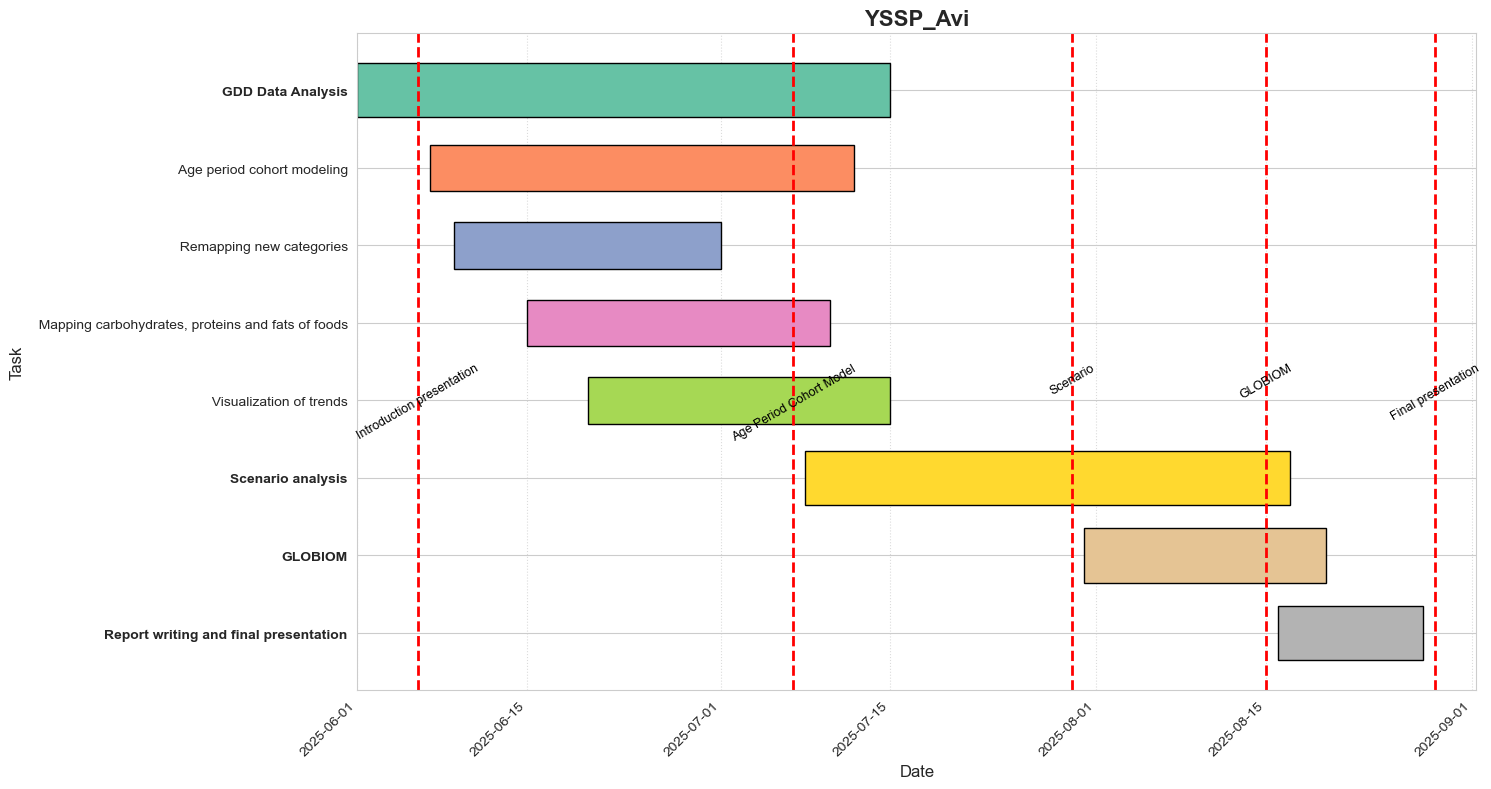

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

# 1. Create a sample pandas DataFrame with Main Tasks and Subtasks - SIMPLIFIED
# National level analysis and its subtasks removed, GDD Data Analysis extended

data = {
    'Task': [
        'GDD Data Analysis',
        '  Age period cohort modeling',
        '  Remapping new categories',
        '  Mapping carbohydrates, proteins and fats of foods',
        '  Visualization of trends',
        'Scenario analysis',
        'GLOBIOM',
        'Report writing and final presentation'
    ],
    'Start': [
        # GDD Data Analysis phase (now extended to July 6)
        datetime(2025, 6, 1), datetime(2025, 6, 7), datetime(2025, 6, 9),
        datetime(2025, 6, 15), datetime(2025, 6, 20),
        # Scenario analysis (between meetings 2 and 3)
        datetime(2025, 7, 8),
        # GLOBIOM (between meetings 3 and 4)
        datetime(2025, 7, 31)
        # Report writing and final presentation (after meeting 4)
        , datetime(2025, 8, 16)
    ],
    'End': [
        # GDD Data Analysis phase now ends before meeting 2
        datetime(2025, 7, 15), datetime(2025, 7, 12), datetime(2025, 7, 1),
        datetime(2025, 7, 10), datetime(2025, 7, 15),
        # Scenario analysis ends before meeting 3
        datetime(2025, 8, 17),
        # GLOBIOM ends before meeting 4
        datetime(2025, 8, 20)
        # Report writing and final presentation ends before final presentation
        , datetime(2025, 8, 28)
    ],
    'Type': [
        'Main Task', 'Subtask', 'Subtask', 'Subtask', 'Subtask',
        'Main Task',
        'Main Task',
        'Main Task'
    ]
}
df = pd.DataFrame(data)

# Ensure 'Start' and 'End' are datetime objects
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# 2. Compute the duration of each task
df['Duration'] = (df['End'] - df['Start']).dt.days

# Convert 'Start' dates to Matplotlib numeric format for plotting
df['Start_num'] = mdates.date2num(df['Start'])

df = df.sort_values(by='Start').reset_index(drop=True)

# 1.1. Define Milestones
milestones_data = {
    'Milestone': [
        'Introduction presentation',
        'Age Period Cohort Model',
        'Scenario',
        'GLOBIOM',
        'Final presentation'
    ],
    'Date': [
        datetime(2025, 6, 6),  
        datetime(2025, 7, 7),
        datetime(2025, 7, 30), 
        datetime(2025, 8, 15), 
        datetime(2025, 8, 29)
    ]
}
milestones_df = pd.DataFrame(milestones_data)
milestones_df['Date'] = pd.to_datetime(milestones_df['Date'])
milestones_df['Date_num'] = mdates.date2num(milestones_df['Date'])

# 3. Use Seaborn for styling and color palette, Matplotlib for drawing bars
sns.set_style("whitegrid") 

fig, ax = plt.subplots(figsize=(15, 8)) # Increased figsize

num_tasks = len(df)
colors = sns.color_palette("Set2", num_tasks) 

for i, task_row in df.iterrows():
    bar_height = 0.6
    if task_row['Type'] == 'Main Task':
        bar_height = 0.7
    ax.barh(
        y=i,
        width=task_row['Duration'],
        left=task_row['Start_num'],
        height=bar_height,
        color=colors[i],
        edgecolor='black'
    )

for idx, milestone_row in milestones_df.iterrows():
    ax.axvline(x=milestone_row['Date_num'], color='red', linestyle='--', linewidth=2, label=f"Milestone: {milestone_row['Milestone']}" if idx == 0 else "_nolegend_")
    ax.text(milestone_row['Date_num'], ax.get_ylim()[0]+0.5 * (ax.get_ylim()[1] - ax.get_ylim()[0]), milestone_row['Milestone'], color='black', ha='center', va='top', rotation=30, fontsize=9)

ax.xaxis_date()
date_formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)
fig.autofmt_xdate(rotation=45, ha='right')

ax.set_yticks(range(num_tasks))
ax.set_yticklabels(df['Task'])

for i, ticklabel in enumerate(ax.get_yticklabels()):
    if df.loc[i, 'Type'] == 'Main Task':
        ticklabel.set_fontweight('bold')

ax.invert_yaxis()
ax.grid(True, axis='x', linestyle=':', alpha=0.7)
ax.set_title('YSSP_Avi', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Task', fontsize=12)


plt.tight_layout()
plt.show()
